# Importing libraries

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Make Regression

In [28]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=100, n_informative=4, noise=5)

Text(0.5, 1.0, 'Dataset')

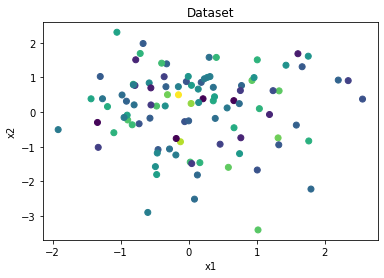

In [29]:
#visualizing dataset
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset')

# PCA VISUALIZATION
it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [30]:
from sklearn.preprocessing import StandardScaler

Now we scale our data,so that each feature has a single unit variance



In [31]:
scalar=StandardScaler()
scalar.fit(x)

StandardScaler()

In [32]:
scaled_data=scalar.transform(x)



now what we're gonna do is instantiate a PC object, find the principal component using fit() method and then apply the rotation in dimensionality redunction like calling transform()

In [33]:
#family PCA is under decomposition (essentially we are decomposing this into principal componenets)
from sklearn.decomposition import PCA

In [34]:
pca= PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [35]:
#now transform to its first principal components
x_pca=pca.transform(scaled_data)

In [36]:
scaled_data.shape

(100, 100)

In [37]:
x_pca.shape

(100, 2)

# modelling

In [38]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression as lr

In [40]:
model = lr()

In [41]:
model.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)

In [43]:
# calculating the result
from sklearn.metrics import mean_squared_error
print("Mean Squared Error is=> ",mean_squared_error(y_test,y_pred))

Mean Squared Error is=>  8964.107187775115


In [44]:
#training accuracy
from sklearn.metrics import r2_score
print("R2 score is=> ",r2_score(y_test,y_pred))
print("Training accuracy=> ",model.score(x_train,y_train))
print("Test accuracy=> ",model.score(x_test,y_test))

R2 score is=>  0.25333847292542055
Training accuracy=>  0.043246771949845164
Test accuracy=>  0.25333847292542055
